In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [2]:
# Load the dataset
file_path = 'student_exam_data_new.csv'
df = pd.read_csv(file_path)

print(df.head())


   Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0


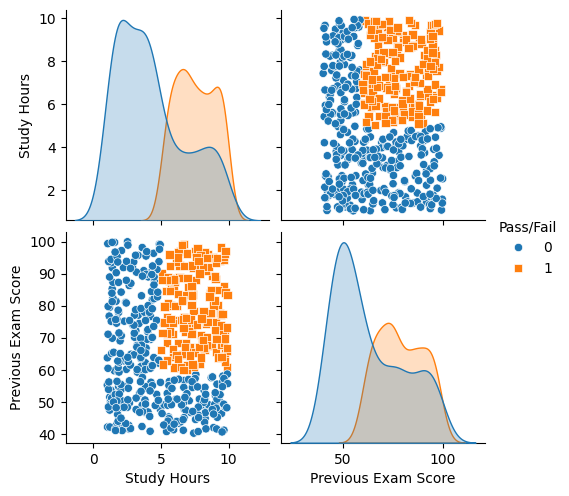

In [3]:
# Visualize the data using seaborn
snp.pairplot(df, hue='Pass/Fail', markers=['o', 's'])
plt.show()

In [4]:
# Define features (X) and target variable (y)
X = df[['Study Hours', 'Previous Exam Score']]
y = df['Pass/Fail']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Save the trained model
final_model = 'pass_prediction_model.joblib'
joblib.dump(model, final_model)
print(f'Model saved as {final_model}')


Model Accuracy: 86.00%
Model saved as pass_prediction_model.joblib


In [5]:
def get_user_input():
    study_hours = float(input('Enter Study Hours: '))
    exam_score = float(input('Enter Previous Exam Score: '))
    user_data = pd.DataFrame([[study_hours, exam_score]], columns=['Study Hours', 'Previous Exam Score'])
    result = model.predict(user_data)
    if result[0] == 1:
        print('Congratulations! You are predicted to pass.')
    else:
        print('Sorry, you are predicted to fail.')

get_user_input()


Congratulations! You are predicted to pass.
